In [1]:
#Import Essential Libraries
import sweetviz
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tpot
from sklearn.preprocessing import OneHotEncoder
import shap
import numpy as np

from sklearn.linear_model import Lasso

In [2]:
file_path = "train_processed.csv"
df = pd.read_csv(file_path)

In [3]:
report = sweetviz.analyze(df)
report.show_html("report.html")

                                             |          | [  0%]   00:00 -> (? left)

c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sweetviz\graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sweetviz\graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sweetviz\graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


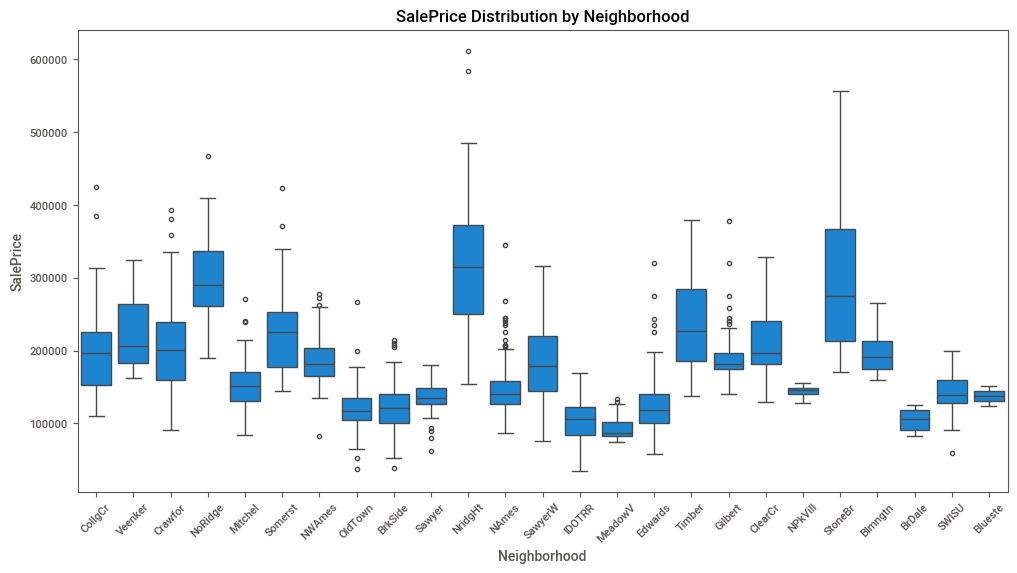

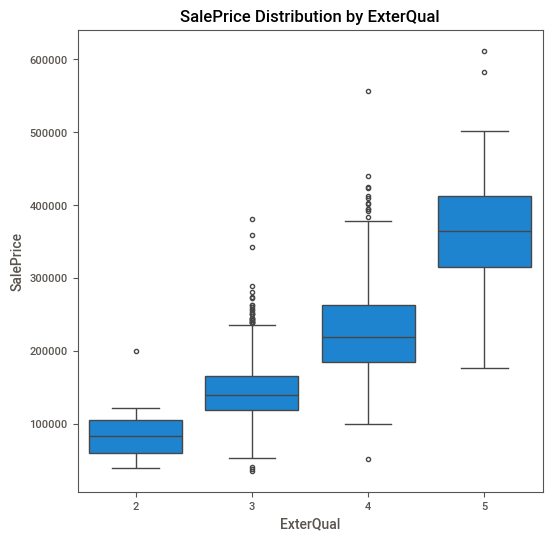

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Example: Boxplot for SalePrice by Neighborhood
# plt.figure(figsize=(12, 6))
# sns.boxplot(x="Neighborhood", y="SalePrice", data=df)
# plt.xticks(rotation=45)
# plt.title("SalePrice Distribution by Neighborhood")
# plt.show()

# # Example: Boxplot for SalePrice by ExterQual
# plt.figure(figsize=(6, 6))
# sns.boxplot(x="ExterQual", y="SalePrice", data=df)
# plt.title("SalePrice Distribution by ExterQual")
# plt.show()


In [ ]:
# print(df.groupby("Neighborhood")["SalePrice"].mean())
# print(df.groupby("ExterQual")["SalePrice"].mean())


Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    123103.070175
ClearCr    206647.384615
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    127110.515464
Gilbert    192854.506329
IDOTRR     102533.714286
MeadowV     95275.000000
Mitchel    155834.808511
NAmes      145440.466063
NPkVill    142694.444444
NWAmes     187511.875000
NoRidge    301637.222222
NridgHt    313363.630137
OldTown    120143.138889
SWISU      140657.666667
Sawyer     135592.944444
SawyerW    184171.789474
Somerst    224461.047059
StoneBr    295030.217391
Timber     238929.250000
Veenker    224150.000000
Name: SalePrice, dtype: float64
ExterQual
2     88522.538462
3    143157.916667
4    228123.966387
5    362098.738095
Name: SalePrice, dtype: float64


In [6]:
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'])
df['YearBuilt'] = df['YearBuilt'].dt.year

df['YearRemodAdd'] = pd.to_datetime(df['YearRemodAdd'])
df['YearRemodAdd'] = df['YearRemodAdd'].dt.year

df['GarageYrBlt'] = pd.to_datetime(df['GarageYrBlt'])
df['GarageYrBlt'] = df['GarageYrBlt'].dt.year

df['YrSold'] = pd.to_datetime(df['YrSold'])
df['YrSold'] = df['YrSold'].dt.year


In [7]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['MSZoning', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Functional', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [8]:
nominal_columns = ['MSZoning', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Functional', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'
]

In [9]:
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'ClearCr' 'NPkVill' 'StoneBr'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
MasVnrType: ['BrkFace' 'Stone' 'BrkCmn']
Foundation: [

In [11]:
data = pd.get_dummies(df, columns=nominal_columns)

In [20]:
y = data["SalePrice"]
x = data.drop("SalePrice", axis = 1)

# 使用 Lasso 進行特徵選擇
model = Lasso(alpha=0.1)
model.fit(x, y)

lasso_coef = pd.Series(model.coef_, index=x.columns)

lasso_selected_features = lasso_coef[lasso_coef != 0].index

# 顯示每個特徵的係數
print("特徵係數：", model.coef_)
print("選擇的特徵：", np.where(model.coef_ != 0)[0])

特徵係數： [ 9.08427416e-01 -4.78986459e+01 -6.95690105e+00  2.37933426e-01
  3.72548317e+02 -5.86957624e+02  1.02050558e+01 -5.01382789e+01
  1.31517245e+01  5.87660121e+03 -2.84303172e+03  3.09628423e+03
 -2.21054753e+03 -4.54371684e+01  8.23095887e+00  1.01740474e+03
  6.40004342e-02  1.40319338e+00  1.06530017e+00 -1.22564033e+03
  8.14378036e+00  1.02487728e+01 -1.63076549e+01  1.98027697e+00
 -1.50032783e+03 -2.27713990e+03 -5.42268322e+02  1.00207496e+03
 -5.13210669e+03 -3.71442854e+03  2.49851443e+03  1.65613758e+03
 -2.07915803e+02  1.00899550e+03 -2.88490890e+01 -5.18894689e+02
  1.24005984e+01 -1.86398161e+03  1.18370030e+03  1.46322917e+00
  1.19018560e+01 -1.09191032e+01  1.04494135e+01 -1.23468510e+01
  8.89295283e+00  7.10642820e+00 -3.21020020e+02  3.31466029e+02
  1.49882077e+05 -6.65431875e-02 -2.78927740e-01 -3.11067290e-01
  4.39919264e-01 -4.16979653e-01  5.71078935e-02  8.68781760e-02
 -1.48809689e-01  7.99935763e-02  1.08347919e-01 -2.78031533e-01
 -7.06612961e-02 -1

c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e+11, tolerance: 7.546e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2


# 使用卡方檢驗進行特徵選擇
selector = SelectKBest(score_func=chi2, k=40)
X_new = selector.fit_transform(x, y)

kbest_selected_features = x.columns[selector.get_support()]


print("原始特徵：", x.columns)
print("選擇的特徵：", x.columns[selector.get_support()])

原始特徵： Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=226)
選擇的特徵： Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MSSubClass_target_enc', 'MSZoning_target_enc',
       'Neighborhood_target_enc', 'Condition1_target_enc',
       'BldgType_target_enc', 'HouseStyle_target_enc', 'RoofStyle_target_enc',
       'Exterior1st_target_enc', 'Exterior2nd_target_e

In [31]:
# 計算皮爾遜相關係數
correlation_matrix = data.corr()

# 取出與目標變數的相關係數
target_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)

# 顯示相關性最高的特徵（排除目標變數本身）
print("Features most correlated with the target:")
print(target_correlation[1:])  # 跳過 target 與自己的相關係數（1.0）

# 選擇與目標變數相關性大於 0.5 的特徵
pearson_highly_correlated_features = target_correlation[abs(target_correlation) > 0.5].index

print("Highly correlated features with the target:")
print(pearson_highly_correlated_features)

Features most correlated with the target:
SalePrice_log              0.958203
OverallQual                0.800604
Neighborhood_target_enc    0.744020
GrLivArea                  0.705591
ExterQual                  0.701154
                             ...   
MSZoning_RM               -0.319826
MasVnrType_BrkFace        -0.333946
Foundation_CBlock         -0.353996
GarageType_Detchd         -0.375713
GarageFinish_Unf          -0.436258
Name: SalePrice, Length: 226, dtype: float64
Highly correlated features with the target:
Index(['SalePrice', 'SalePrice_log', 'OverallQual', 'Neighborhood_target_enc',
       'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'YearBuilt', 'FullBath',
       'Foundation_target_enc', 'YearRemodAdd', 'Foundation_PConc',
       'TotRmsAbvGrd', 'GarageType_target_enc', 'MSSubClass_target_enc'],
      dtype='object')


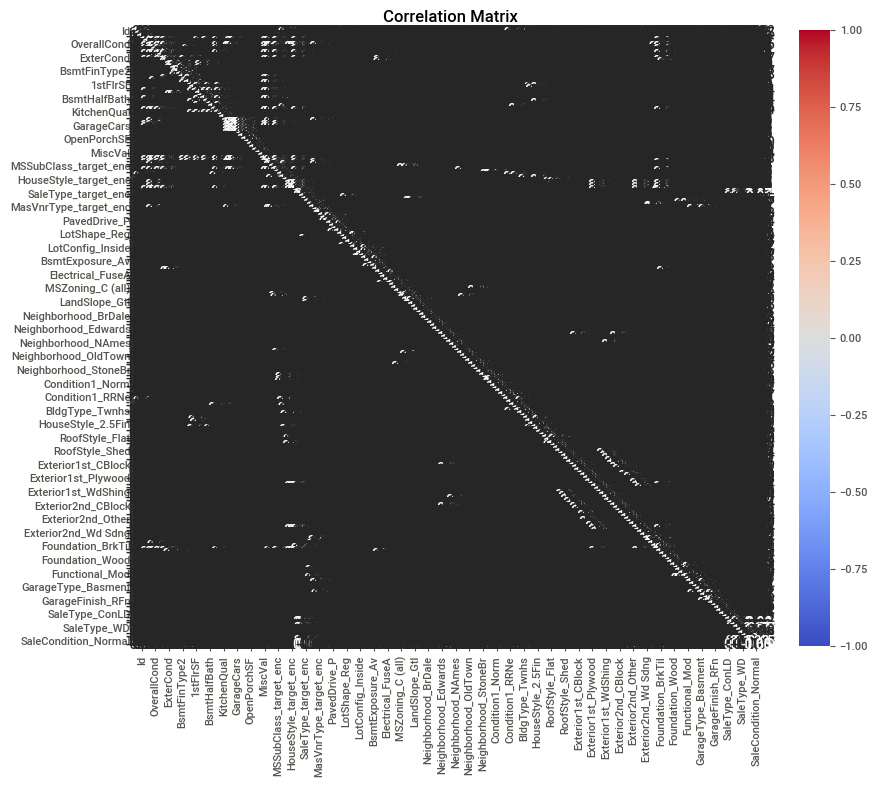

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()


In [32]:
common_features = set(lasso_selected_features) & set(kbest_selected_features) & set(pearson_highly_correlated_features)
print("Common Features Selected by All Methods:")
print(common_features)


Common Features Selected by All Methods:
{'GarageType_target_enc', '1stFlrSF', 'Foundation_target_enc', 'Neighborhood_target_enc', 'MSSubClass_target_enc', 'GrLivArea', 'TotalBsmtSF', 'GarageArea'}


In [37]:
# 篩選出這些欄位
selected_columns = ['GarageType_target_enc', '1stFlrSF', 'Foundation_target_enc', 'Neighborhood_target_enc', 'MSSubClass_target_enc', 'GrLivArea', 'TotalBsmtSF', 'GarageArea','SalePrice']
selected_df = data[selected_columns]

# 將選擇的欄位輸出為 CSV 文件
selected_df.to_csv("selected_features.csv", index=False)  # index=False 不保存索引


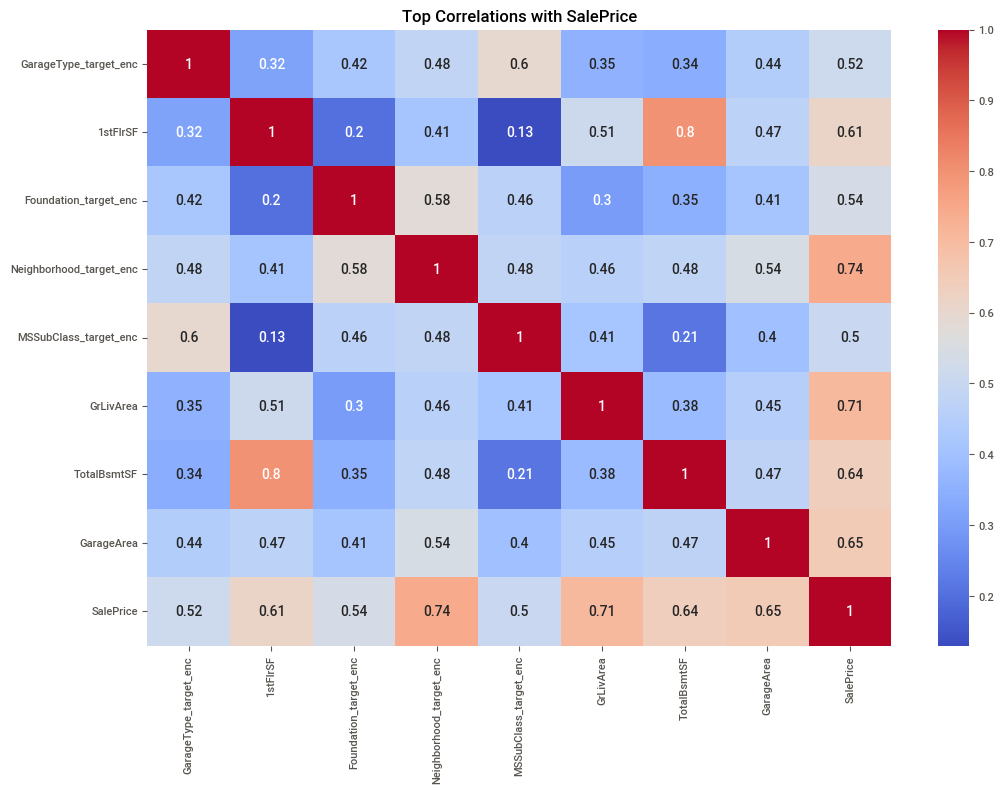

In [38]:
# Plot the top correlations
plt.figure(figsize=(12, 8))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm')
plt.title(f'Top Correlations with SalePrice')
plt.show()